In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Import Libraries** 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

TensorFlow version: 2.16.1


In [2]:
# Set parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Data directory path
data_dir = '/kaggle/input/industrial-images-dataset/Industrial-Equipment' 

# basic augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

print("Classes:", train_generator.class_indices)

Found 5513 images belonging to 2 classes.
Found 1377 images belonging to 2 classes.
Classes: {'Defected': 0, 'Non-Defected': 1}


# **Creating and Compiling the Model**

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     4,735,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,791,425 (18.28 MB)

 Trainable params: 4,791,425 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

# **Training the model**

In [9]:
# Training
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 132s 739ms/step - accuracy: 0.6657 - loss: 0.6762 - val_accuracy: 0.8765 - val_loss: 0.3046
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 125s 716ms/step - accuracy: 0.9024 - loss: 0.2250 - val_accuracy: 0.9441 - val_loss: 0.1865
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 140s 707ms/step - accuracy: 0.9672 - loss: 0.1017 - val_accuracy: 0.9557 - val_loss: 0.1404
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 124s 709ms/step - accuracy: 0.9689 - loss: 0.0826 - val_accuracy: 0.9194 - val_loss: 0.1870
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 123s 705ms/step - accuracy: 0.9703 - loss: 0.0786 - val_accuracy: 0.9804 - val_loss: 0.0749
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 123s 708ms/step - accuracy: 0.9880 - loss: 0.0432 - val_accuracy: 0.9724 - val_loss: 0.0857
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 152s 769ms/step - accuracy: 0.9923 - loss: 0.0270 - val_accuracy: 0.9666 - val_loss: 0.0710
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 123s 705ms/step - accuracy: 0.9879 - loss: 0.03

# **Visualizing**

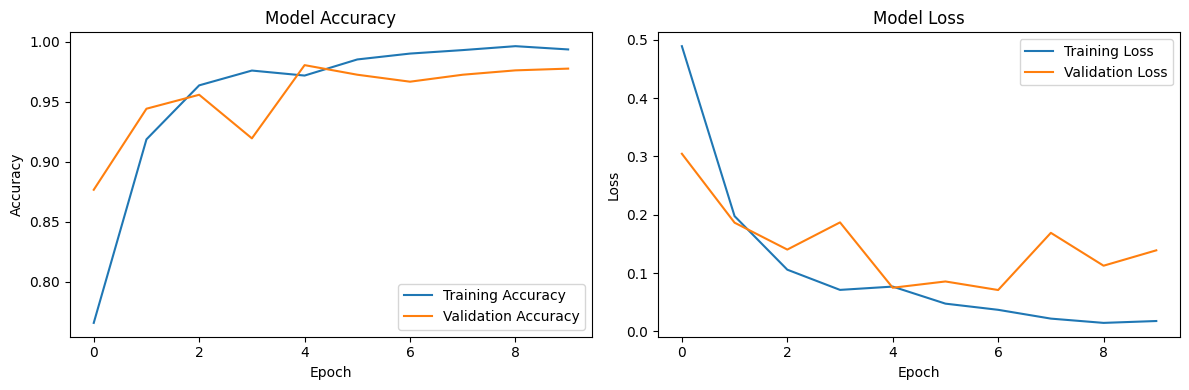

In [10]:
# Plot training 
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Model Performance**

In [11]:
# predictions
predictions = model.predict(validation_generator)
y_pred = (predictions > 0.5).astype(int)
y_true = validation_generator.classes[:len(y_pred)]

# classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Defective', 'Defective']))

44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step

Classification Report:
               precision    recall  f1-score   support

Non-Defective       0.53      0.52      0.53       708
    Defective       0.51      0.52      0.51       669

     accuracy                           0.52      1377
    macro avg       0.52      0.52      0.52      1377
 weighted avg       0.52      0.52      0.52      1377



# **Saving the model**

In [12]:
# Saving the model
model.save('defect_classification_model.h5')
print("Model saved as 'defect_classification_model.h5'")

Model saved as 'defect_classification_model.h5'
